In [1]:
# Data preprocessing
import konlpy
from konlpy.tag import Hannanum, Kkma, Komoran,Okt
from pprint import pprint


import nltk
from nltk.tokenize import word_tokenize
#nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Document representation 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Document classifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Classifier measure
from sklearn.metrics import accuracy_score

import re
import sys
import os
import time
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#그래프 스타일 지정
plt.style.use('seaborn') 
# ‘default’,‘dark_background’,‘classic’,‘ggplot’,‘seaborn’

import matplotlib as mpl
mpl.rcParams.update({'font.size':25})

plt.rc('font',family='Malgun Gothic')
#plt.rc('font', family='AppleGothic')

%matplotlib inline

## 파일 READ

In [2]:
th = ['15th', '16th', '17th', '18th', '19th']
files = ['15th_president.txt', '16th_president.txt', '17th_president.txt',
         '18th_president.txt', '19th_president.txt']
data = {}
for idx ,filename in enumerate(files):
    f = open(files[idx], 'r')
    data[th[idx]] = [f.read()]
    f.close()
    

## 텍스트 전처리

In [3]:
for idx,dataname in enumerate(data):  
    data[dataname] = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in data[dataname]]
    data[dataname] = [re.sub("\'", " ", x) for x in data[dataname]]
    data[dataname] = [re.sub('\S*@\S*\s?', '', x) for x in data[dataname]]
    data[dataname] = [re.sub('\s+', ' ', x) for x in data[dataname]]
    data[dataname] = [re.sub('[^\w\s]','',x) for x in data[dataname]]

In [4]:
data['16th']

['존경하는 국민 여러분 오늘 저는 대한민국의 제16대 대통령에 취임하기 위해 이 자리에 섰습니다 국민 여러분의 위대한 선택으로 저는 대한민국의 새 정부를 운영할 영광스러운 책임을 맡게 되었습니다 국민 여러분께 뜨거운 감사를 올리면서 이 벅찬 소명을 국민 여러분과 함께 완수해 나갈 것임을 약속드립니다 아울러 이 자리에 참석해 주신 김대중 대통령을 비롯한 전임 대통령 여러분 고이즈미 준이치로 일본총리를 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 심심한 감사를 드립니다 특별히 이 자리를 빌려 대구 지하철 참사 희생자 여러분의 명복을 빌면서 유가족 여러분께도 깊은 위로의 말씀을 드립니다 다시는 이런 불행이 되풀이되지 않게 재난관리체계를 전면적으로 점검하고 획기적으로 개선해 안전한 사회를 만들도록 최선을 다하겠습니다 국민 여러분 우리의 역사는 도전과 극복의 연속이었습니다 열강의 틈에 놓인 한반도에서 숱한 고난을 이겨내고 반만년 동안 민족의 자존과 독자적 문화를 지켜왔습니다 해방 이후에는 분단과 전쟁과 가난을 딛고 반세기만에 세계 열 두번째의 경제 강국을 건설했습니다 우리는 농경시대에서 산업화를 거쳐 지식정보화 시대에 성공적으로 진입했습니다 그러나 지금 우리는 다시 세계사적 전환점에 직면했습니다 도약이냐 후퇴냐 평화냐 긴장이냐의 갈림길에 서 있습니다 세계의 안보 상황이 불안합니다 이라크 정세가 긴박합니다 특히 북한 핵 문제를 둘러싼 국제사회의 우려가 고조되고 있습니다 이럴수록 우리는 평화를 지키고 더욱 굳건히 뿌리내리게 해야 합니다 대외 경제 환경도 어려워지고 있습니다 선진국들은 끝없이 새로운 영역을 개척하며 뻗어가고 있습니다 후발국들은 무섭게 추격해 오고 있습니다 우리는 새로운 성장 동력과 발전 전략을 요구받고 있습니다 우리 사회 내부에도 국가의 명운을 결정지을 많은 문제들이 가로놓여 있습니다 이들 과제는 국민 여러분의 지혜와 결단을 기다리고 있습니다 이 모든 도전을 극복해야 합니다 우리는 해낼 수 있습니다 우리 국민이 힘을 합치면 못할 것이 없습니다 그런

## POS Tagger 를 이용한 형태소 COUNT

In [5]:
taggers = [('kkma', Kkma()), ('okt', Okt()), ('hannanum', Hannanum())]

C:\Users\HANWHALIFE\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
for name, tagger in taggers:
    print('tagger name = {:10}\tclass_name = {}'.format(name, tagger.__class__))

tagger name = kkma      	class_name = <class 'konlpy.tag._kkma.Kkma'>
tagger name = okt       	class_name = <class 'konlpy.tag._okt.Okt'>
tagger name = hannanum  	class_name = <class 'konlpy.tag._hannanum.Hannanum'>


In [7]:
import time

tokens_count = []

for name, tagger in taggers:
    
    process_time = time.time()    
    tokens_count.append([pos for sent in data['16th'] for pos in tagger.pos(sent)])    
    process_time = time.time() - process_time # POS Tagger당 Processing Time
    
    print('tagger name = {}, {:.3} secs'.format(name, process_time))

tagger name = kkma, 7.41 secs
tagger name = okt, 3.21 secs
tagger name = hannanum, 0.734 secs


In [8]:
print(tokens_count[0][:30], '... ', '{} tokens'.format(len(tokens_count[0])))

[('존경', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('국민', 'NNG'), ('여러분', 'NP'), ('오늘', 'MAG'), ('저', 'NP'), ('는', 'JX'), ('대한민국', 'NNG'), ('의', 'JKG'), ('제', 'NNG'), ('16', 'NR'), ('대', 'NNM'), ('대통령', 'NNG'), ('에', 'JKM'), ('취임', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('위하', 'VV'), ('어', 'ECS'), ('이', 'MDT'), ('자리', 'NNG'), ('에', 'JKM'), ('서', 'VV'), ('었', 'EPT'), ('습니다', 'EFN'), ('국', 'NNG'), ('민', 'NNG'), ('여러분', 'NP'), ('의', 'JKG')] ...  2584 tokens


In [9]:
from collections import Counter
from pprint import pprint

for (name, _), _tokens in zip(taggers, tokens_count):
    print('\n\nPart of speech tagger: {}'.format(name))
    counter = Counter(_tokens)
    counter = {word:freq for word, freq in counter.items() if (freq >= 4) and (word[1][:1] == 'N')} # 4회 이상 출현 단어중, POS가 N으로 시작하는
    pprint(sorted(counter.items(), key=lambda x:x[1], reverse=True))



Part of speech tagger: kkma
[(('우리', 'NP'), 33),
 (('것', 'NNB'), 25),
 (('국민', 'NNG'), 18),
 (('여러분', 'NP'), 17),
 (('동북아', 'NNG'), 17),
 (('평화', 'NNG'), 16),
 (('시대', 'NNG'), 15),
 (('세계', 'NNG'), 13),
 (('사회', 'NNG'), 13),
 (('한반도', 'NNG'), 12),
 (('저', 'NP'), 10),
 (('북한', 'NNG'), 10),
 (('발전', 'NNG'), 9),
 (('경제', 'NNG'), 8),
 (('수', 'NNB'), 8),
 (('국가', 'NNG'), 7),
 (('번영', 'NNG'), 7),
 (('국', 'NNG'), 6),
 (('핵', 'NNG'), 6),
 (('세기', 'NNG'), 6),
 (('대화', 'NNG'), 6),
 (('존경', 'NNG'), 5),
 (('새', 'NNG'), 5),
 (('정부', 'NNG'), 5),
 (('문화', 'NNG'), 5),
 (('문제', 'NNG'), 5),
 (('21', 'NR'), 5),
 (('정책', 'NNG'), 5),
 (('대통령', 'NNG'), 4),
 (('민', 'NNG'), 4),
 (('감사', 'NNG'), 4),
 (('역사', 'NNG'), 4),
 (('도전', 'NNG'), 4),
 (('극복', 'NNG'), 4),
 (('성장', 'NNG'), 4),
 (('이', 'NNG'), 4),
 (('과제', 'NNG'), 4),
 (('미래', 'NNG'), 4),
 (('유럽', 'NNG'), 4),
 (('기회', 'NNG'), 4),
 (('노력', 'NNG'), 4),
 (('추진', 'NNG'), 4),
 (('원칙', 'NNG'), 4),
 (('협력', 'NNG'), 4),
 (('개발', 'NNG'), 4),
 (('개혁', 'NNG'), 4),


## 토큰 데이터 탐색

In [10]:
okt = Okt()
tokens = {}

for idx,dataname in enumerate(data) : 
    tokens[dataname] = [pos for sent in data[dataname] for pos in okt.nouns(sent)]

In [11]:
tokens['16th']

['존경',
 '국민',
 '여러분',
 '오늘',
 '저',
 '대한민국',
 '제',
 '대통령',
 '취임',
 '위해',
 '이',
 '자리',
 '국민',
 '여러분',
 '선택',
 '저',
 '대한민국',
 '새',
 '정부',
 '운영',
 '영광',
 '책임',
 '국민',
 '여러분',
 '감사',
 '이',
 '소명',
 '국민',
 '여러분',
 '완수',
 '것임',
 '약속',
 '이',
 '자리',
 '참석',
 '주신',
 '김대중',
 '대통령',
 '비롯',
 '전임',
 '대통령',
 '여러분',
 '고이즈미',
 '준',
 '이치로',
 '총리',
 '비롯',
 '세계',
 '각국',
 '경축',
 '사절',
 '내외',
 '귀빈',
 '여러분',
 '도',
 '감사',
 '이',
 '자리',
 '대구',
 '지하철',
 '참사',
 '희생',
 '여러분',
 '명복',
 '유가족',
 '여러분',
 '도',
 '위로',
 '말씀',
 '불행',
 '되풀이',
 '재난',
 '관리',
 '체계',
 '전면',
 '점검',
 '획기',
 '개선',
 '사회',
 '최선',
 '국민',
 '여러분',
 '우리',
 '역사',
 '도전',
 '극복',
 '연속',
 '열강',
 '틈',
 '한반도',
 '숱',
 '고난',
 '반만년',
 '동안',
 '민족',
 '자존',
 '독자',
 '문화',
 '해방',
 '이후',
 '분단',
 '전쟁',
 '가난',
 '반세기',
 '세계',
 '열',
 '두번째',
 '경제',
 '강국',
 '건설',
 '우리',
 '농경',
 '시대',
 '산업화',
 '지식',
 '정보화',
 '시대',
 '성공',
 '진입',
 '지금',
 '우리',
 '다시',
 '세계사',
 '전환',
 '점',
 '직면',
 '도약',
 '후퇴',
 '평화',
 '긴장',
 '의',
 '갈림길',
 '세계',
 '안보',
 '상황',
 '이라크',
 '정세',
 '북한',
 '핵',
 '문제',
 '국제사

In [12]:
text = nltk.Text(tokens['16th'])
print(text.vocab().most_common(10))

[('우리', 33), ('국민', 23), ('것', 23), ('여러분', 17), ('동북아', 17), ('평화', 16), ('시대', 15), ('이', 13), ('세계', 13), ('한반도', 12)]


In [13]:
##워드 클라우드를 이용한 시각화

In [14]:
from wordcloud import WordCloud,STOPWORDS
def displayWordCloud(data=None, backgroundcolor='white',width=1600,height=800):
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/H2SA1M.ttf',
                         stopwords=STOPWORDS,
                         background_color=backgroundcolor,
                         width=width, height=height).generate(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

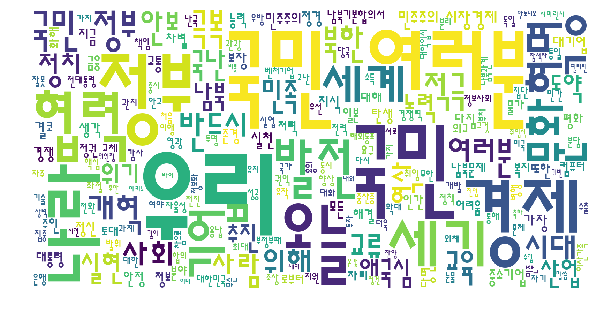

In [15]:
displayWordCloud(' '.join(tokens['15th']))

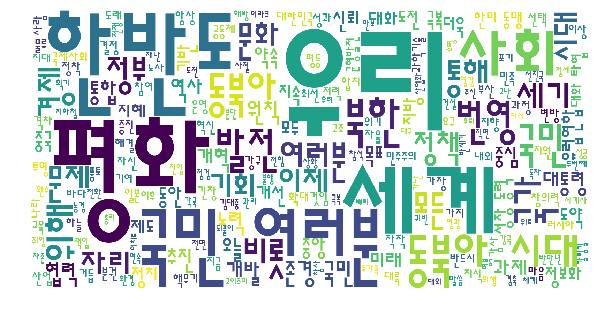

In [16]:
displayWordCloud(' '.join(tokens['16th']))

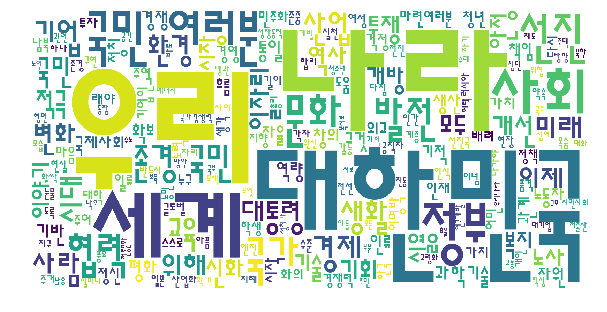

In [17]:
displayWordCloud(' '.join(tokens['17th']))

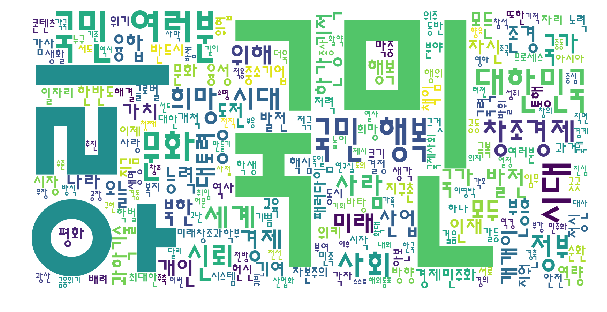

In [18]:
displayWordCloud(' '.join(tokens['18th']))

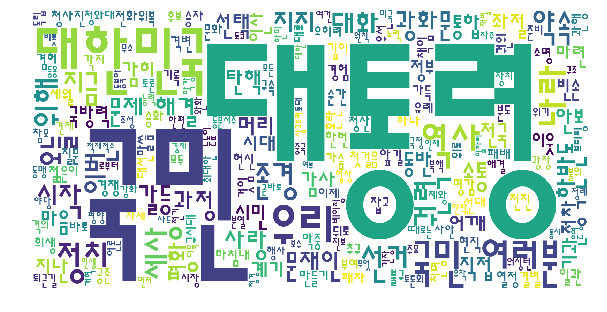

In [19]:
displayWordCloud(' '.join(tokens['19th']))